In [1]:
from full_pipeline.full_pipeline import PathPlanner
from utils.math_utils import angleFrom2dVector, unit2dVectorFromAngle, rotate
from utils.cone_types import ConeTypes

import numpy as np

Get part of track

In [2]:
phi_inner = np.arange(0, np.pi / 2, np.pi / 15)
phi_outer = np.arange(0, np.pi / 2, np.pi / 20)

points_inner = unit2dVectorFromAngle(phi_inner) * 9
points_outer = unit2dVectorFromAngle(phi_outer) * 12

center = np.mean((points_inner[:2] + points_outer[:2]) / 2, axis=0)
points_inner -= center
points_outer -= center

rotated_points_inner = rotate(points_inner, -np.pi / 2)
rotated_points_outer = rotate(points_outer, -np.pi / 2)
cones_left_raw = rotated_points_inner
cones_right_raw = rotated_points_outer


rng = np.random.default_rng(0)
rng.shuffle(cones_left_raw)
rng.shuffle(cones_right_raw)


car_position = np.array([0.0, 0.0])
car_direction = np.array([1.0, 0.0])

car_direction_angle = angleFrom2dVector(car_direction)

In [3]:
mask_is_left = np.ones(len(cones_left_raw), dtype=bool)
mask_is_right = np.ones(len(cones_right_raw), dtype=bool)

# for demonstration purposes, we will only keep the color of the first 4 cones
# on each side
mask_is_left[np.argsort(np.linalg.norm(cones_left_raw, axis=1))[4:]] = False
mask_is_right[np.argsort(np.linalg.norm(cones_right_raw, axis=1))[4:]] = False

cones_left = cones_left_raw[mask_is_left]
cones_right = cones_right_raw[mask_is_right]
cones_unknown = np.row_stack(
    [cones_left_raw[~mask_is_left], cones_right_raw[~mask_is_right]]
)

/home/mohd_yasser1/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


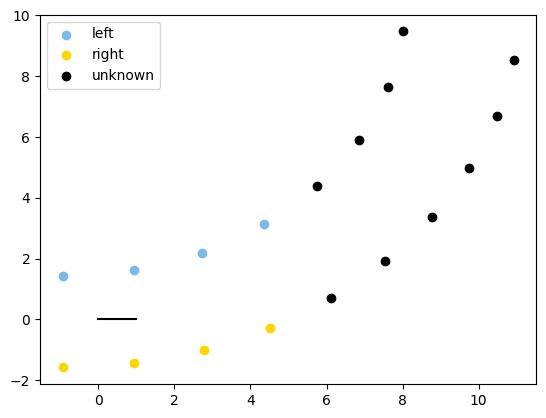

In [4]:
import matplotlib.pyplot as plt

blue_color = "#7CB9E8"
yellow_color = "gold"

plt.scatter(cones_left[:, 0], cones_left[:, 1], c=blue_color, label="left")
plt.scatter(cones_right[:, 0], cones_right[:, 1], c=yellow_color, label="right")
plt.scatter(cones_unknown[:, 0], cones_unknown[:, 1], c="k", label="unknown")
plt.legend()
plt.plot(
    [car_position[0], car_position[0] + car_direction[0]],
    [car_position[1], car_position[1] + car_direction[1]],
    c="k",
)

In [5]:
def drawCones(cones_left, cones_right, cones_unknown, car_position, car_direction):
    blue_color = "#7CB9E8"
    yellow_color = "gold"

    plt.scatter(cones_left[:, 0], cones_left[:, 1], c=blue_color, label="left")
    plt.scatter(cones_right[:, 0], cones_right[:, 1], c=yellow_color, label="right")
    plt.scatter(cones_unknown[:, 0], cones_unknown[:, 1], c="k", label="unknown")
    plt.legend()
    plt.plot(
        [car_position[0], car_position[0] + car_direction[0]],
        [car_position[1], car_position[1] + car_direction[1]],
        c="k",
    )   

In [6]:
for i, c in enumerate(ConeTypes):
    print(c, f"= {i}")

cones_by_type = [np.zeros((0, 2)) for _ in range(5)]
cones_by_type[ConeTypes.LEFT] = cones_left
cones_by_type[ConeTypes.RIGHT] = cones_right
cones_by_type[ConeTypes.UNKNOWN] = cones_unknown

ConeTypes.UNKNOWN = 0
ConeTypes.RIGHT = 1
ConeTypes.LEFT = 2
ConeTypes.START_FINISH_AREA = 3
ConeTypes.START_FINISH_LINE = 4


In [7]:
pathPlanner = PathPlanner()

path = pathPlanner.calculatePathInGlobalFrame(
    cones=cones_by_type,
    vehiclePosition=car_position,
    vehicleDirection=car_direction_angle,
)


path

[13 28 27]
[23  0  5]
[39]
[0]


array([[ 0.00000000e+00, -4.44089210e-16],
       [ 9.37104699e-01,  8.61028766e-02],
       [ 1.85259988e+00,  3.05893822e-01],
       [ 2.73487653e+00,  6.31398621e-01],
       [ 3.61715319e+00,  9.56903419e-01],
       [ 4.42589682e+00,  1.43806105e+00],
       [ 5.23464045e+00,  1.91921868e+00],
       [ 5.94216408e+00,  2.53969370e+00],
       [ 6.64968770e+00,  3.16016871e+00],
       [ 7.23189964e+00,  3.89867716e+00],
       [ 7.81411158e+00,  4.63718561e+00],
       [ 8.30604876e+00,  5.43995412e+00],
       [ 8.67751874e+00,  6.30458640e+00],
       [ 9.04898872e+00,  7.16921868e+00],
       [ 9.00109683e+00,  7.88373665e+00],
       [ 8.90752402e+00,  8.59371812e+00],
       [ 8.76865479e+00,  9.29624563e+00],
       [ 8.58505980e+00,  9.98843233e+00],
       [ 8.35749346e+00,  1.06674339e+01],
       [ 8.08689091e+00,  1.13304602e+01],
       [ 7.77436409e+00,  1.19747866e+01],
       [ 7.42119727e+00,  1.25977655e+01],
       [ 7.02884166e+00,  1.31968370e+01]])

(-1.5297177038177339,
 11.507768392038084,
 -2.325249870306754,
 13.935983992044296)

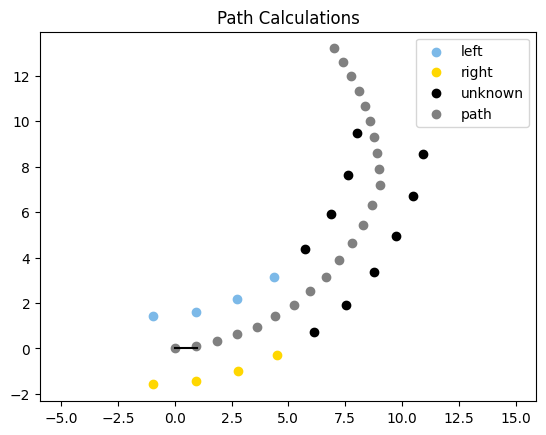

In [8]:

blue_color = "#7CB9E8"
yellow_color = "gold"

plt.scatter(cones_left[:, 0], cones_left[:, 1], c=blue_color, label="left")
plt.scatter(cones_right[:, 0], cones_right[:, 1], c=yellow_color, label="right")
plt.scatter(cones_unknown[:, 0], cones_unknown[:, 1], c="k", label="unknown")
plt.plot(
    [car_position[0], car_position[0] + car_direction[0]],
    [car_position[1], car_position[1] + car_direction[1]],
    c="k",
)
plt.scatter(path[:,0], path[:,1], c='gray', label="path")
plt.legend()
plt.title("Path Calculations")
plt.axis("equal")

Test less cones

ConeTypes.UNKNOWN = 0
ConeTypes.RIGHT = 1
ConeTypes.LEFT = 2
ConeTypes.START_FINISH_AREA = 3
ConeTypes.START_FINISH_LINE = 4


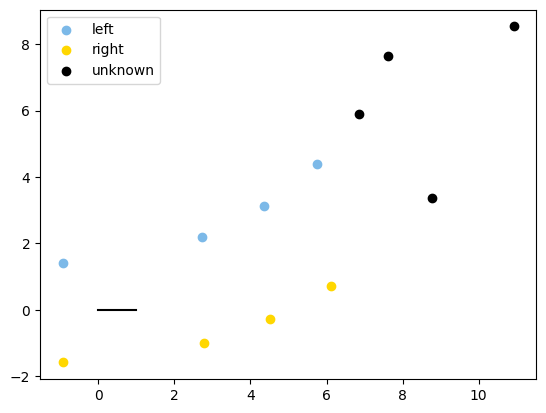

In [9]:
cones_left_raw = rotated_points_inner[:6]
cones_right_raw = rotated_points_outer[:6]

rng = np.random.default_rng(0)
rng.shuffle(cones_left_raw)
rng.shuffle(cones_right_raw)

mask_is_left = np.ones(len(cones_left_raw), dtype=bool)
mask_is_right = np.ones(len(cones_right_raw), dtype=bool)

# for demonstration purposes, we will only keep the color of the first 4 cones
# on each side
mask_is_left[np.argsort(np.linalg.norm(cones_left_raw, axis=1))[4:]] = False
mask_is_right[np.argsort(np.linalg.norm(cones_right_raw, axis=1))[4:]] = False

cones_left = cones_left_raw[mask_is_left]
cones_right = cones_right_raw[mask_is_right]
cones_unknown = np.row_stack(
    [cones_left_raw[~mask_is_left], cones_right_raw[~mask_is_right]]
)

drawCones(cones_left, cones_right, cones_unknown, car_position, car_direction)
for i, c in enumerate(ConeTypes):
    print(c, f"= {i}")

cones_by_type = [np.zeros((0, 2)) for _ in range(5)]
cones_by_type[ConeTypes.LEFT] = cones_left
cones_by_type[ConeTypes.RIGHT] = cones_right
cones_by_type[ConeTypes.UNKNOWN] = cones_unknown

In [10]:
path = pathPlanner.calculatePathInGlobalFrame(
    cones=cones_by_type,
    vehiclePosition=car_position,
    vehicleDirection=car_direction_angle,
)

[14]
[0]
[13]
[0]


(-1.5297177038177339,
 11.507768392038084,
 -2.3255540531336396,
 13.942371831408897)

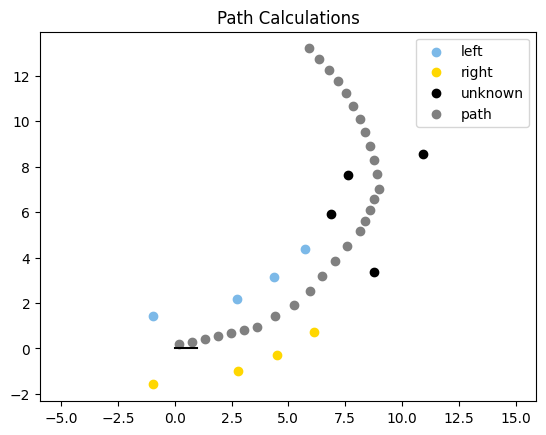

In [11]:

blue_color = "#7CB9E8"
yellow_color = "gold"

plt.scatter(cones_left[:, 0], cones_left[:, 1], c=blue_color, label="left")
plt.scatter(cones_right[:, 0], cones_right[:, 1], c=yellow_color, label="right")
plt.scatter(cones_unknown[:, 0], cones_unknown[:, 1], c="k", label="unknown")
plt.plot(
    [car_position[0], car_position[0] + car_direction[0]],
    [car_position[1], car_position[1] + car_direction[1]],
    c="k",
)
plt.scatter(path[:,0], path[:,1], c='gray', label="path")
plt.legend()
plt.title("Path Calculations")
plt.axis("equal")

ConeTypes.UNKNOWN = 0
ConeTypes.RIGHT = 1
ConeTypes.LEFT = 2
ConeTypes.START_FINISH_AREA = 3
ConeTypes.START_FINISH_LINE = 4


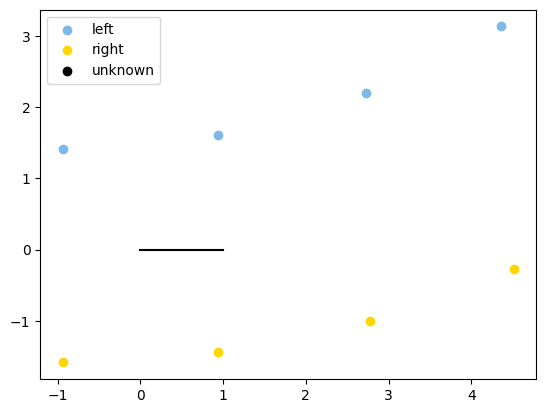

In [36]:
phi_inner = np.arange(0, np.pi / 2, np.pi / 15)
phi_outer = np.arange(0, np.pi / 2, np.pi / 20)

points_inner = unit2dVectorFromAngle(phi_inner) * 9
points_outer = unit2dVectorFromAngle(phi_outer) * 12

center = np.mean((points_inner[:2] + points_outer[:2]) / 2, axis=0)
points_inner -= center
points_outer -= center

rotated_points_inner = rotate(points_inner, -np.pi / 2)
rotated_points_outer = rotate(points_outer, -np.pi / 2)
cones_left_raw = rotated_points_inner[:4]
cones_right_raw = rotated_points_outer[:4]


mask_is_left = np.ones(len(cones_left_raw), dtype=bool)
mask_is_right = np.ones(len(cones_right_raw), dtype=bool)

# for demonstration purposes, we will only keep the color of the first 4 cones
# on each side
mask_is_left[np.argsort(np.linalg.norm(cones_left_raw, axis=1))[4:]] = False
mask_is_right[np.argsort(np.linalg.norm(cones_right_raw, axis=1))[4:]] = False

cones_left = cones_left_raw[mask_is_left]
cones_right = cones_right_raw[mask_is_right]
cones_unknown = np.row_stack(
    [cones_left_raw[~mask_is_left], cones_right_raw[~mask_is_right]]
)

drawCones(cones_left, cones_right, cones_unknown, car_position, car_direction)
for i, c in enumerate(ConeTypes):
    print(c, f"= {i}")

cones_by_type = [np.zeros((0, 2)) for _ in range(5)]
cones_by_type[ConeTypes.LEFT] = cones_left
cones_by_type[ConeTypes.RIGHT] = cones_right
cones_by_type[ConeTypes.UNKNOWN] = cones_unknown

In [37]:
path = pathPlanner.calculatePathInGlobalFrame(
    cones=cones_by_type,
    vehiclePosition=car_position,
    vehicleDirection=car_direction_angle,
)

[12]
[0]
[15]
[0]


(-1.3221193110061196,
 7.148202142994184,
 -2.376910214351901,
 15.020851216992385)

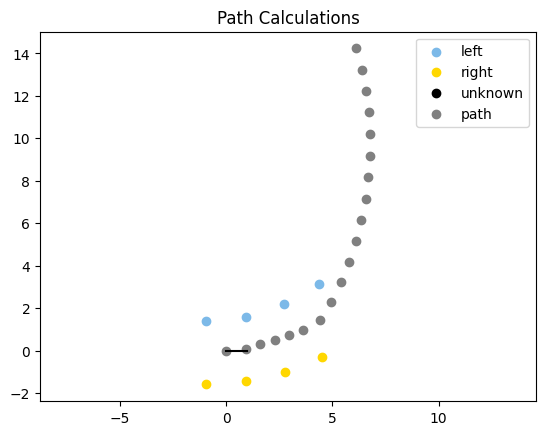

In [38]:

blue_color = "#7CB9E8"
yellow_color = "gold"

plt.scatter(cones_left[:, 0], cones_left[:, 1], c=blue_color, label="left")
plt.scatter(cones_right[:, 0], cones_right[:, 1], c=yellow_color, label="right")
plt.scatter(cones_unknown[:, 0], cones_unknown[:, 1], c="k", label="unknown")
plt.plot(
    [car_position[0], car_position[0] + car_direction[0]],
    [car_position[1], car_position[1] + car_direction[1]],
    c="k",
)
plt.scatter(path[:,0], path[:,1], c='gray', label="path")
plt.legend()
plt.title("Path Calculations")
plt.axis("equal")